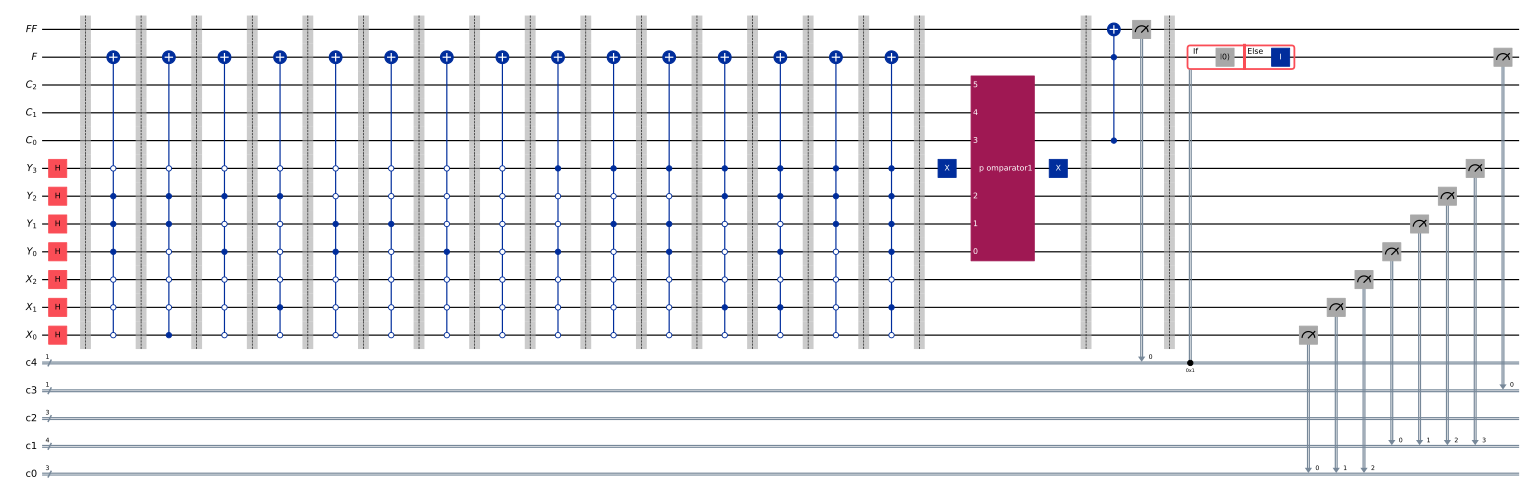

In [1]:
#删除（0，5）删除小于5的，只是用p控制，去选出比5小的，0也包含，(0,1,2,3,4)被删除
from qiskit.visualization import circuit_drawer
from qiskit.visualization import utils
from qiskit.circuit.library import IntegerComparator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit.library import HGate
from qiskit.circuit.library import MCXGate
from qiskit_aer import Aer
from qiskit import *
from qiskit.visualization import plot_histogram

#####寄存
q_X = QuantumRegister(3, name='X')

q_Y = QuantumRegister(4, name='Y')
q_C = QuantumRegister(3, name='C')
q_F = QuantumRegister(1, name='F')
q_FF = QuantumRegister(1, name='FF')

c_X = ClassicalRegister(3)

c_Y = ClassicalRegister(4)
c_C = ClassicalRegister(3)
c_F = ClassicalRegister(1)
c_FF = ClassicalRegister(1)
size = 3 # number of state qubits
value = 3 # the fixed value to compare with
#comp = IntegerComparator(size, 1, geq=True, name=' n Comparator')
comp1 = IntegerComparator(size, 5, geq=False, name='p omparator1')
#my_gate = comp.to_gate().control(1)
my_gate1 = comp1.to_gate().control(1)
circuit = QuantumCircuit(q_X,q_Y,q_C,q_F,q_FF,c_X,c_Y,c_C,c_F,c_FF)# ,q_B,c_B

#####HHHHHHHHHHHHHHHHHHHHHH
for h in range(7):
    circuit.append( HGate(),[h]) 
circuit.barrier()

gate5 = MCXGate(7,ctrl_state='0111000')#[0,7]
circuit.append(gate5, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate11 = MCXGate(7,ctrl_state='0110001')#[1,6]
circuit.append(gate11, [q_X[0], q_X[1] ,q_X[2], q_Y[0], q_Y[1] ,q_Y[2],q_Y[3],q_F[0]])#门的名称，控制位，控制目标
circuit.barrier()         #1      0        0        0      1      1      0      1


gate6 = MCXGate(7,ctrl_state='0101000')#[0,5]
circuit.append(gate6, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate10 = MCXGate(7,ctrl_state='0100010')#[2,4]
circuit.append(gate10, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate7 = MCXGate(7,ctrl_state='0011000')#[0,3]
circuit.append(gate7, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate9 = MCXGate(7,ctrl_state='0010000')#[0,2]
circuit.append(gate9, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate12 = MCXGate(7,ctrl_state='0001000')#[0,1]
circuit.append(gate12, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate8 = MCXGate(7,ctrl_state='0000000')#[0,0]
circuit.append(gate8, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate4 = MCXGate(7,ctrl_state='1001000')#[0,-1]
circuit.append(gate4, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate13 = MCXGate(7,ctrl_state='1010000')#[0,-2]
circuit.append(gate13, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate3 = MCXGate(7,ctrl_state='1011000')#[0,-3]
circuit.append(gate3, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate14 = MCXGate(7,ctrl_state='1100010')#[2,-4]
circuit.append(gate14, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate2 = MCXGate(7,ctrl_state='1101010')#[2,-5]
circuit.append(gate2, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate15 = MCXGate(7,ctrl_state='1110000')#[0,-6]
circuit.append(gate15, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate1 = MCXGate(7,ctrl_state='1111010')#[2,-7]        ###0后紧跟最高位，到着排列################################
circuit.append(gate1, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()


####COMAR\
#circuit.x(3)
#circuit.append(my_gate, [3,  4, 5,6,7,8,9])#门的名称，控制位，控制目标\
#circuit.x(3) 
circuit.x(6) 
circuit.append(my_gate1, [6,  3,4, 5,7,8,9])#门的名称，控制位，控制目标\
circuit.x(6) 

circuit.barrier()
circuit.ccx(q_C[0],q_F[0],q_FF[0])
circuit.measure(q_FF[0], c_FF[0])
circuit.barrier()
with circuit.if_test((c_FF, 0b1))as else_:
    circuit.reset(q_F[0])  
with else_:
    circuit.id(q_F[0]) 
    

    

circuit.measure(q_X, c_X)
circuit.measure(q_Y, c_Y)
circuit.measure(q_F, c_F)
#circuit.measure(q_Y[3], c_Y[3])
#circuit.measure(q_Y[0], c_Y[0])

###circuit.measure(q_Y[0], c_Y[0])
###circuit.measure(q_Y[1], c_Y[1])
###circuit.measure(q_Y[2], c_Y[2])
###circuit.measure(q_Y[3], c_Y[3])



circuit.draw(output='mpl',reverse_bits=True,scale=0.6,fold=100)


In [2]:
from qiskit import transpile
from qiskit_aer import AerSimulator
 
simulator = AerSimulator()
 
circ = transpile(circuit, backend=simulator)
job = simulator.run(circ,shots=20000)
for bitstring in sorted(job.result().get_counts()):
    print(bitstring)  #Y的坐标最后一位是标志位，前面顺着都是高到低位1100----0 110 =

0 0 000 0000 001
0 0 000 0000 010
0 0 000 0000 011
0 0 000 0000 100
0 0 000 0000 101
0 0 000 0000 110
0 0 000 0000 111
0 0 000 0001 001
0 0 000 0001 010
0 0 000 0001 011
0 0 000 0001 100
0 0 000 0001 101
0 0 000 0001 110
0 0 000 0001 111
0 0 000 0010 001
0 0 000 0010 010
0 0 000 0010 011
0 0 000 0010 100
0 0 000 0010 101
0 0 000 0010 110
0 0 000 0010 111
0 0 000 0011 001
0 0 000 0011 010
0 0 000 0011 011
0 0 000 0011 100
0 0 000 0011 101
0 0 000 0011 110
0 0 000 0011 111
0 0 000 0100 000
0 0 000 0100 001
0 0 000 0100 011
0 0 000 0100 100
0 0 000 0100 101
0 0 000 0100 110
0 0 000 0100 111
0 0 000 0101 001
0 0 000 0101 010
0 0 000 0101 011
0 0 000 0101 100
0 0 000 0101 101
0 0 000 0101 110
0 0 000 0101 111
0 0 000 0110 000
0 0 000 0110 010
0 0 000 0110 011
0 0 000 0110 100
0 0 000 0110 101
0 0 000 0110 110
0 0 000 0110 111
0 0 000 0111 001
0 0 000 0111 010
0 0 000 0111 011
0 0 000 0111 100
0 0 000 0111 101
0 0 000 0111 110
0 0 000 0111 111
0 0 000 1000 000
0 0 000 1000 001
0 0 000 1000 0

In [ ]:
#删除（-3，5）保留了-76543，765 .删除-21，01234
from qiskit.visualization import circuit_drawer
from qiskit.visualization import utils
from qiskit.circuit.library import IntegerComparator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit.library import HGate
from qiskit.circuit.library import MCXGate
from qiskit_aer import Aer
from qiskit import *
from qiskit.visualization import plot_histogram

#####寄存
q_X = QuantumRegister(3, name='X')

q_Y = QuantumRegister(4, name='Y')
q_C = QuantumRegister(3, name='C')
q_F = QuantumRegister(1, name='F')
q_FF = QuantumRegister(1, name='FF')

c_X = ClassicalRegister(3)

c_Y = ClassicalRegister(4)
c_C = ClassicalRegister(3)
c_F = ClassicalRegister(1)
c_FF = ClassicalRegister(1)
size = 3 # number of state qubits
value = 3 # the fixed value to compare with
comp = IntegerComparator(size, 3, geq=False, name=' n Comparator')
comp1 = IntegerComparator(size, 5, geq=False, name='p omparator1')
my_gate = comp.to_gate().control(1)
my_gate1 = comp1.to_gate().control(1)
circuit = QuantumCircuit(q_X,q_Y,q_C,q_F,q_FF,c_X,c_Y,c_C,c_F,c_FF)# ,q_B,c_B

#####HHHHHHHHHHHHHHHHHHHHHH
for h in range(7):
    circuit.append( HGate(),[h]) 
circuit.barrier()

gate5 = MCXGate(7,ctrl_state='0111000')#[0,7]
circuit.append(gate5, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate11 = MCXGate(7,ctrl_state='0110001')#[1,6]
circuit.append(gate11, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()


gate6 = MCXGate(7,ctrl_state='0101000')#[0,5]
circuit.append(gate6, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate10 = MCXGate(7,ctrl_state='0100010')#[2,4]
circuit.append(gate10, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate7 = MCXGate(7,ctrl_state='0011000')#[0,3]
circuit.append(gate7, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate9 = MCXGate(7,ctrl_state='0010000')#[0,2]
circuit.append(gate9, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate12 = MCXGate(7,ctrl_state='0001000')#[0,1]
circuit.append(gate12, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate8 = MCXGate(7,ctrl_state='0000000')#[0,0]
circuit.append(gate8, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate4 = MCXGate(7,ctrl_state='1001000')#[0,-1]
circuit.append(gate4, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate13 = MCXGate(7,ctrl_state='1010000')#[0,-2]
circuit.append(gate13, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate3 = MCXGate(7,ctrl_state='1011000')#[0,-3]
circuit.append(gate3, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate14 = MCXGate(7,ctrl_state='1100010')#[2,-4]
circuit.append(gate14, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate2 = MCXGate(7,ctrl_state='1101010')#[2,-5]
circuit.append(gate2, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate15 = MCXGate(7,ctrl_state='1110000')#[0,-6]
circuit.append(gate15, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate1 = MCXGate(7,ctrl_state='1111010')#[2,-7]        ###0后紧跟最高位，到着排列################################
circuit.append(gate1, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()


####COMAR\
#circuit.x(3)
circuit.append(my_gate, [6,  3,4, 5,7,8,9])#门的名称，控制位，控制目标\
#circuit.x(3) 
circuit.x(6) 
circuit.append(my_gate1, [6,  3,4, 5,7,8,9])#门的名称，控制位，控制目标\
circuit.x(6) 

circuit.barrier()
circuit.ccx(q_C[0],q_F[0],q_FF[0])
circuit.measure(q_FF[0], c_FF[0])
circuit.barrier()
with circuit.if_test((c_FF, 0b1))as else_:
    circuit.reset(q_F[0])  
with else_:
    circuit.id(q_F[0]) 
    

    

circuit.measure(q_X, c_X)
circuit.measure(q_Y, c_Y)
circuit.measure(q_F, c_F)
#circuit.measure(q_Y[3], c_Y[3])
#circuit.measure(q_Y[0], c_Y[0])

###circuit.measure(q_Y[0], c_Y[0])
###circuit.measure(q_Y[1], c_Y[1])
###circuit.measure(q_Y[2], c_Y[2])
###circuit.measure(q_Y[3], c_Y[3])



circuit.draw(output='mpl',reverse_bits=True,scale=0.6,fold=100)


In [ ]:
from qiskit import transpile
from qiskit_aer import AerSimulator
 
simulator = AerSimulator()
 
circ = transpile(circuit, backend=simulator)
job = simulator.run(circ,shots=20000)
for bitstring in sorted(job.result().get_counts()):
    print(bitstring)  #Y的坐标最后一位是标志位，前面顺着都是高到低位1100----0 110 =

In [ ]:
#(-3,5)
from qiskit.visualization import circuit_drawer
from qiskit.visualization import utils
from qiskit.circuit.library import IntegerComparator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit.library import HGate
from qiskit.circuit.library import MCXGate
from qiskit_aer import Aer
from qiskit import *
from qiskit.visualization import plot_histogram

#####寄存
q_X = QuantumRegister(3, name='X')

q_Y = QuantumRegister(4, name='Y')
q_C = QuantumRegister(3, name='C')
q_F = QuantumRegister(1, name='F')


c_X = ClassicalRegister(3)

c_Y = ClassicalRegister(4)
c_C = ClassicalRegister(3)
c_F = ClassicalRegister(1)

size = 3 # number of state qubits
value = 3 # the fixed value to compare with
#comp = IntegerComparator(size, 1, geq=True, name=' n Comparator')


#c1控制的大于等于的5  c2控制绝对值大于等于3的，所以只保留[-2,4]
comp1 = IntegerComparator(size, 5, geq=True, name='p omparator1')
#my_gate = comp.to_gate().control(1)
my_gate1 = comp1.to_gate().control(1)

#comp2 = IntegerComparator(size, 3, geq=True, name='n omparator1')
#my_gate2 = comp2.to_gate().control(1)

circuit = QuantumCircuit(q_X,q_Y,q_C,q_F,c_X,c_Y,c_C,c_F)# ,q_B,c_B

#####HHHHHHHHHHHHHHHHHHHHHH
for h in range(7):
    circuit.append( HGate(),[h]) 
circuit.barrier()

gate1 = MCXGate(7,ctrl_state='1111010')#[2,-7]        ###0后紧跟最高位，到着排列################################
circuit.append(gate1, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate2 = MCXGate(7,ctrl_state='1101010')#[2,-3]

circuit.append(gate2, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate3 = MCXGate(7,ctrl_state='1011000')#[0,-3]
circuit.append(gate3, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate4 = MCXGate(7,ctrl_state='1001000')#[0,-1]
circuit.append(gate4, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate5 = MCXGate(7,ctrl_state='0111000')#[0,7]
circuit.append(gate5, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate6 = MCXGate(7,ctrl_state='0101000')#[0,5]
circuit.append(gate6, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate7 = MCXGate(7,ctrl_state='0011000')#[0,3]
circuit.append(gate7, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate8 = MCXGate(7,ctrl_state='0000000')#[0,0]
circuit.append(gate8, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate9 = MCXGate(7,ctrl_state='0010000')#[0,2]

circuit.append(gate9, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate10 = MCXGate(7,ctrl_state='0100010')#[2,4]
circuit.append(gate10, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate11 = MCXGate(7,ctrl_state='0110001')#[1,6]
circuit.append(gate11, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate12 = MCXGate(7,ctrl_state='0001000')#[0,1]
circuit.append(gate12, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate13 = MCXGate(7,ctrl_state='1010000')#[0,-2]
circuit.append(gate13, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate14 = MCXGate(7,ctrl_state='1100010')#[2,-4]
circuit.append(gate14, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate15 = MCXGate(7,ctrl_state='1110000')#[0,-7]
circuit.append(gate15, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标

circuit.barrier()
####COMAR\
#circuit.x(3)
#circuit.append(my_gate, [3,  4, 5,6,7,8,9])#门的名称，控制位，控制目标\
#circuit.x(3) 
circuit.x(6) 
circuit.append(my_gate1, [6,  3,4, 5,7,8,9])#门的名称，控制位，控制目标\
circuit.x(6) 
#circuit.append(my_gate2, [6,  3,4, 5,7,8,9])#门的名称，控制位，控制目标\

circuit.barrier()
circuit.measure(q_C[0], c_C[0])
with circuit.if_test((c_C, 0b1))as else_:
         circuit.reset(10)  
with else_:
    circuit.id(10) 
    

circuit.measure(q_X, c_X)
#circuit.measure(q_Y[2], c_Y[2])
#circuit.measure(q_Y[3], c_Y[3])
#circuit.measure(q_Y[0], c_Y[0])

###circuit.measure(q_Y[0], c_Y[0])
###circuit.measure(q_Y[1], c_Y[1])
###circuit.measure(q_Y[2], c_Y[2])
###circuit.measure(q_Y[3], c_Y[3])
circuit.measure(q_Y, c_Y)

circuit.measure(q_F, c_F)
circuit.draw(output='mpl',reverse_bits=True,scale=0.6,fold=100)


In [ ]:
from qiskit import transpile
from qiskit_aer import AerSimulator
 
simulator = AerSimulator()
 
circ = transpile(circuit, backend=simulator)
job = simulator.run(circ,shots=20000)
for bitstring in sorted(job.result().get_counts()):
    print(bitstring)  #Y的坐标最后一位是标志位，前面顺着都是高到低位1100----0 110 =

In [ ]:
#删除小于5的，只是用p控制，去选出比5小的，0也包含，负数不包含
from qiskit.visualization import circuit_drawer
from qiskit.visualization import utils
from qiskit.circuit.library import IntegerComparator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit.library import HGate
from qiskit.circuit.library import MCXGate
from qiskit_aer import Aer
from qiskit import *
from qiskit.visualization import plot_histogram

#####寄存
q_X = QuantumRegister(3, name='X')

q_Y = QuantumRegister(4, name='Y')
q_C = QuantumRegister(3, name='C')
q_F = QuantumRegister(1, name='F')


c_X = ClassicalRegister(3)

c_Y = ClassicalRegister(4)
c_C = ClassicalRegister(3)
c_F = ClassicalRegister(1)

size = 3 # number of state qubits
value = 3 # the fixed value to compare with
#comp = IntegerComparator(size, 1, geq=True, name=' n Comparator')
comp1 = IntegerComparator(size, 5, geq=False, name='p omparator1')
#my_gate = comp.to_gate().control(1)
my_gate1 = comp1.to_gate().control(1)
circuit = QuantumCircuit(q_X,q_Y,q_C,q_F,c_X,c_Y,c_C,c_F)# ,q_B,c_B

#####HHHHHHHHHHHHHHHHHHHHHH
for h in range(7):
    circuit.append( HGate(),[h]) 
circuit.barrier()

gate5 = MCXGate(7,ctrl_state='0111000')#[0,7]
circuit.append(gate5, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate11 = MCXGate(7,ctrl_state='0110001')#[1,6]
circuit.append(gate11, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()


gate6 = MCXGate(7,ctrl_state='0101000')#[0,5]
circuit.append(gate6, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate10 = MCXGate(7,ctrl_state='0100010')#[2,4]
circuit.append(gate10, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate7 = MCXGate(7,ctrl_state='0011000')#[0,3]
circuit.append(gate7, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate9 = MCXGate(7,ctrl_state='0010000')#[0,2]
circuit.append(gate9, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate12 = MCXGate(7,ctrl_state='0001000')#[0,1]
circuit.append(gate12, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate8 = MCXGate(7,ctrl_state='0000000')#[0,0]
circuit.append(gate8, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate4 = MCXGate(7,ctrl_state='1001000')#[0,-1]
circuit.append(gate4, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate13 = MCXGate(7,ctrl_state='1010000')#[0,-2]
circuit.append(gate13, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate3 = MCXGate(7,ctrl_state='1011000')#[0,-3]
circuit.append(gate3, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate14 = MCXGate(7,ctrl_state='1100010')#[2,-4]
circuit.append(gate14, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate2 = MCXGate(7,ctrl_state='1101010')#[2,-5]
circuit.append(gate2, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate15 = MCXGate(7,ctrl_state='1110000')#[0,-6]
circuit.append(gate15, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()

gate1 = MCXGate(7,ctrl_state='1111010')#[2,-7]        ###0后紧跟最高位，到着排列################################
circuit.append(gate1, [0, 1 ,2, 3, 4, 5,  6,10])#门的名称，控制位，控制目标
circuit.barrier()


####COMAR\
#circuit.x(3)
#circuit.append(my_gate, [3,  4, 5,6,7,8,9])#门的名称，控制位，控制目标\
#circuit.x(3) 
circuit.x(6) 
circuit.append(my_gate1, [6,  3,4, 5,7,8,9])#门的名称，控制位，控制目标\
circuit.x(6) 
circuit.barrier()
circuit.measure(q_C[0], c_C[0])
with circuit.if_test((c_C[0], 0b1))as else_:
    circuit.reset(q_F[0])  
with else_:
    circuit.id(q_F[0]) 
circuit.barrier()

    

circuit.measure(q_X, c_X)
circuit.measure(q_Y, c_Y)
circuit.measure(q_F[0], c_F[0])
#circuit.measure(q_Y[3], c_Y[3])
#circuit.measure(q_Y[0], c_Y[0])

###circuit.measure(q_Y[0], c_Y[0])
###circuit.measure(q_Y[1], c_Y[1])
###circuit.measure(q_Y[2], c_Y[2])
###circuit.measure(q_Y[3], c_Y[3])



circuit.draw(output='mpl',reverse_bits=True,scale=0.6,fold=100)


In [ ]:
from qiskit import transpile
from qiskit_aer import AerSimulator
 
simulator = AerSimulator()
 
circ = transpile(circuit, backend=simulator)
job = simulator.run(circ,shots=20000)
for bitstring in sorted(job.result().get_counts()):
    print(bitstring)  #Y的坐标最后一位是标志位，前面顺着都是高到低位1100----0 110 =

In [ ]:

from qiskit.visualization import circuit_drawer
from qiskit.visualization import utils
from qiskit.circuit.library import IntegerComparator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit.library import HGate
from qiskit.circuit.library import MCXGate
from qiskit_aer import Aer
from qiskit import *
from qiskit.visualization import plot_histogram

#####寄存

q_X = QuantumRegister(4, name='X')
q_Y = QuantumRegister(5, name='Y')
q_F = QuantumRegister(1, name='F')
q_FF = QuantumRegister(1, name='FF')
c_X = ClassicalRegister(4)
c_Y = ClassicalRegister(5)
c_F = ClassicalRegister(1)
size = 3 # number of state qubits
value = 3 # the fixed value to compare with
#comp = IntegerComparator(size, 1, geq=True, name=' n Comparator')
comp1 = IntegerComparator(size, 5, geq=False, name='p omparator1')
#my_gate = comp.to_gate().control(1)
my_gate1 = comp1.to_gate().control(1)
circuit = QuantumCircuit(q_X,q_Y,q_F,c_X,c_Y,c_F)# ,q_B,c_B

#####HHHHHHHHHHHHHHHHHHHHHH
for h in range(2):
    circuit.append( HGate(),[h]) 
circuit.append( HGate(),[3]) 
for h in range(4,7):
    circuit.append( HGate(),[h])     
circuit.append( HGate(),[8])     
circuit.barrier()

gate5 = MCXGate(7,ctrl_state='0111000')#[0,7]
circuit.append(gate5, [q_X[0], q_X[1] ,q_X[3], q_Y[0], q_Y[1] ,q_Y[2],q_Y[4],q_F[0]])#门的名称，控制位，控制目标
circuit.barrier()
gate11 = MCXGate(7,ctrl_state='0110001')#[1,6]
circuit.append(gate11, [q_X[0], q_X[1] ,q_X[3], q_Y[0], q_Y[1] ,q_Y[2],q_Y[4],q_F[0]])#门的名称，控制位，控制目标
circuit.barrier()         #1      0        0        0      1      1      0      1


gate1 = MCXGate(7,ctrl_state='0110101')#[1,6]
circuit.append(gate1, [q_X[0], q_X[1] ,q_X[3], q_Y[0], q_Y[1] ,q_Y[2],q_Y[4],q_F[0]])#门的名称，控制位，控制目标
circuit.barrier()         #1      0        0        0      1      1      0      1

gate2 = MCXGate(2,ctrl_state='01')
circuit.append(gate2, [q_X[0], q_X[1] ,q_X[2]])#门的名称，控制位，控制目标 

circuit.measure(q_X, c_X)
circuit.measure(q_Y, c_Y)
circuit.measure(q_F, c_F)
#circuit.measure(q_Y[3], c_Y[3])
#circuit.measure(q_Y[0], c_Y[0])

###circuit.measure(q_Y[0], c_Y[0])
###circuit.measure(q_Y[1], c_Y[1])
###circuit.measure(q_Y[2], c_Y[2])
###circuit.measure(q_Y[3], c_Y[3])



circuit.draw(output='mpl',reverse_bits=True,scale=0.6,fold=100)


In [ ]:
from qiskit import transpile
from qiskit_aer import AerSimulator
 
simulator = AerSimulator()
 
circ = transpile(circuit, backend=simulator)
job = simulator.run(circ,shots=20000)
for bitstring in sorted(job.result().get_counts()):
    print(bitstring)  #Y的坐标最后一位是标志位，前面顺着都是高到低位1100----0 110 =

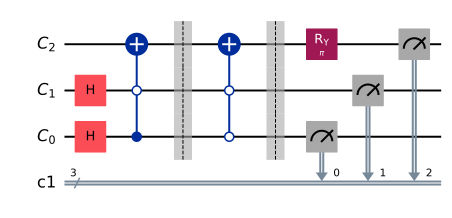

In [3]:

from qiskit.visualization import circuit_drawer
from qiskit.visualization import utils
from qiskit.circuit.library import IntegerComparator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit.library import HGate
from qiskit.circuit.library import MCXGate
from qiskit_aer import Aer
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np
#####寄存

q_C = QuantumRegister(3, name='C')
c_C = ClassicalRegister(3)

circuit = QuantumCircuit(q_C,c_C)# ,q_B,c_B

circuit.append( HGate(),[0])   
circuit.append( HGate(),[1])   
gate = MCXGate(2,ctrl_state='01')#[0,7]
circuit.append(gate,(0,1,2))
circuit.barrier()

gate1 = MCXGate(2,ctrl_state='00')#[0,7]
circuit.append(gate1,(0,1,2))
circuit.barrier()
circuit.ry((np.pi), 2)#基态0保持为0的概率很大
#circuit.ry((np.pi/-2), 2)#基态0保持为0的概率很大
circuit.measure(q_C, c_C)





circuit.draw(output='mpl',reverse_bits=True,scale=1,fold=100)


000
001
110
111


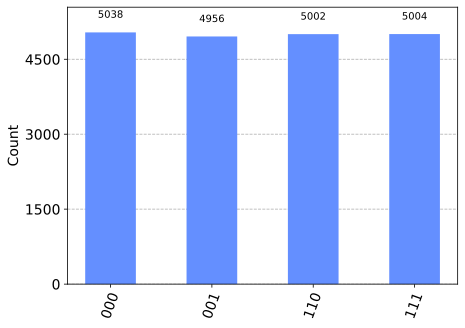

In [4]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 选择模拟器
simulator = AerSimulator()

# 编译量子电路
circ = transpile(circuit, backend=simulator)

# 运行量子电路
job = simulator.run(circ, shots=20000)

# 获取并排序计数结果
counts = job.result().get_counts()

# 打印bitstring（已排序）
for bitstring in sorted(counts):
    print(bitstring)

# 使用plot_histogram画出概率分布
plot_histogram(counts)
